In [256]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

from sklearn import preprocessing

from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

from sklearn import metrics
from sklearn.metrics import accuracy_score, mean_squared_error,mean_absolute_error,r2_score

In [257]:
data = pd.read_csv("Googleplaystore.csv")

In [258]:
# DATA EXPLORATION 

In [259]:
# Print first few rows from data

data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [260]:
# Print last few rows from data

data.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [261]:
# Shape of data 

data.shape

(10841, 13)

In [262]:
# Basic information of data

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [263]:
# Checking null values

data.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [264]:
# Types of data

data.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [265]:
# Columns present in our data

data.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [266]:
playstore = data[data.Type == 'Free']

In [267]:
# DATA CLEANING 

In [268]:
# The best way to fill missing values might be using the median instead of mean

playstore['Rating'] = playstore['Rating'].fillna(playstore['Rating'].median())

In [269]:
# Count the number of unique values in category column 

playstore['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

In [270]:
# DATA VISUALIZATION

Text(0.5, 1.0, 'Count of application according to category')

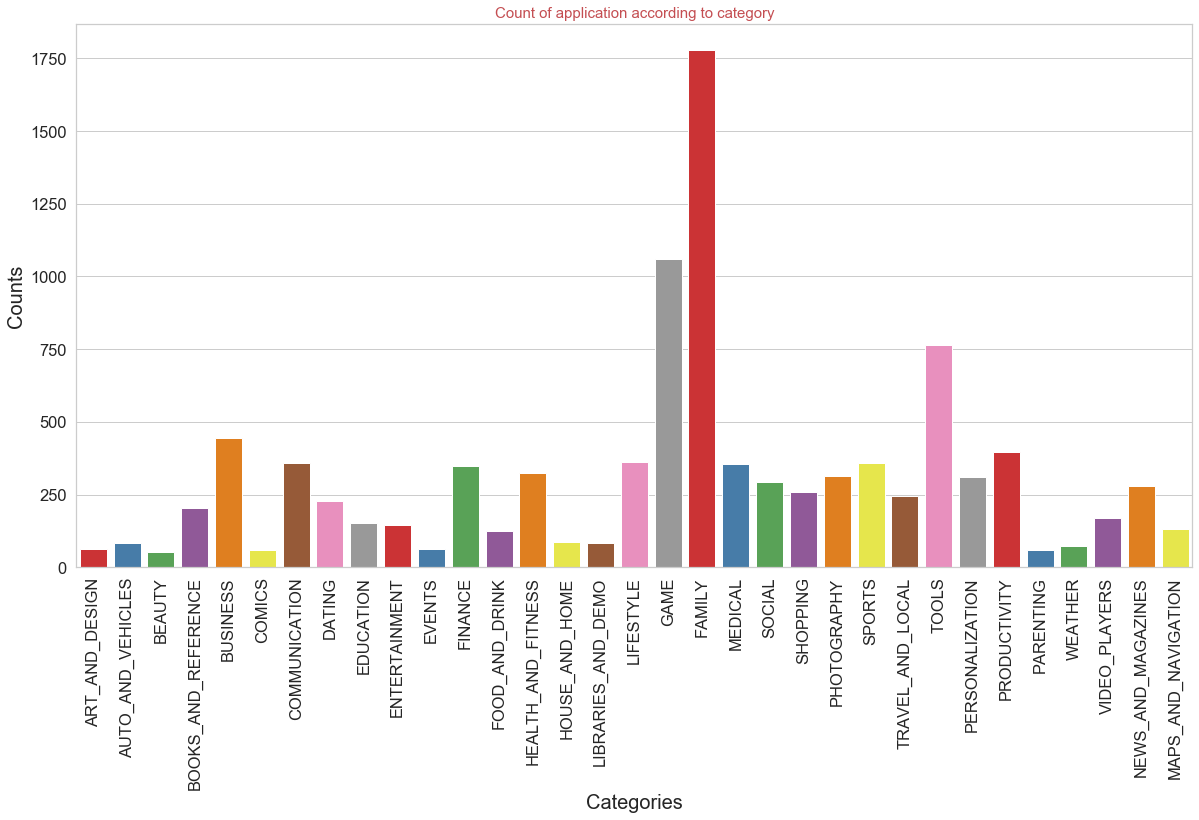

In [271]:
# TO COUNT THE APPLICATION ACCORDING TO CATEGORY 

plt.figure(figsize=(20, 10))
sns.countplot(x='Category', data=playstore, palette='Set1')
plt.xticks(rotation=90)
plt.xlabel('Categories', fontsize=20)
plt.ylabel('Counts', fontsize=20)
plt.title('Count of application according to category', fontsize=15, color='r')

# CONCLUSION 
# From the data, we can conclude that family category having the highest number of application in Google Playstore. 

Text(0.5, 1.0, 'Distribution of Rating')

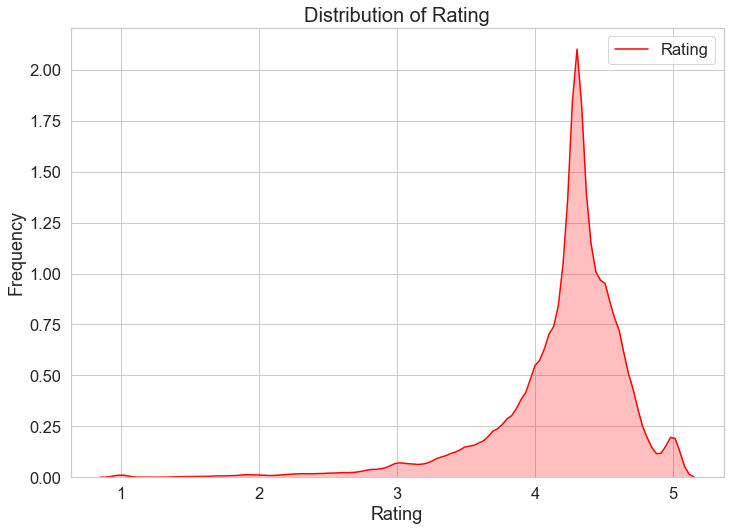

In [272]:
# TO IDENTIFY THE DISTRIBUTION OF RATING 

from pylab import rcParams

rcParams['figure.figsize'] = 11.7, 8.27
g = sns.kdeplot(playstore.Rating, color="Red", shade = True)
g.set_xlabel("Rating")
g.set_ylabel("Frequency")
plt.title('Distribution of Rating',size = 20)

# CONCLUSION 
# From the data, we can conclude that most of the application have above 4.0 application ratings

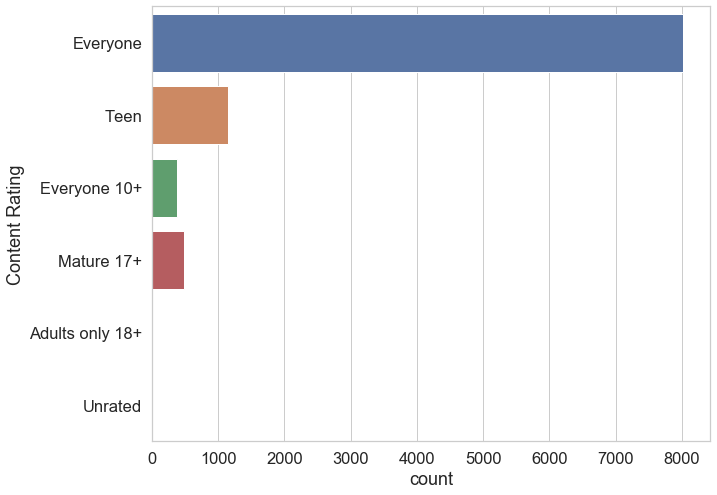

In [273]:
# TO IDENTIFY WHICH CONTENT RATING THAT HAVE THE HIGHEST NUMBER 

plt.figure(figsize=(10,8))
ax = sns.countplot(y='Content Rating', data=playstore)

# CONCLUSION 
# From the data, we can conclude that the application are mostly for everyone. This is happen perhaps because if digital products are eligible to everyone,
# there will be a higher demand for the application and also reach a wider exposure

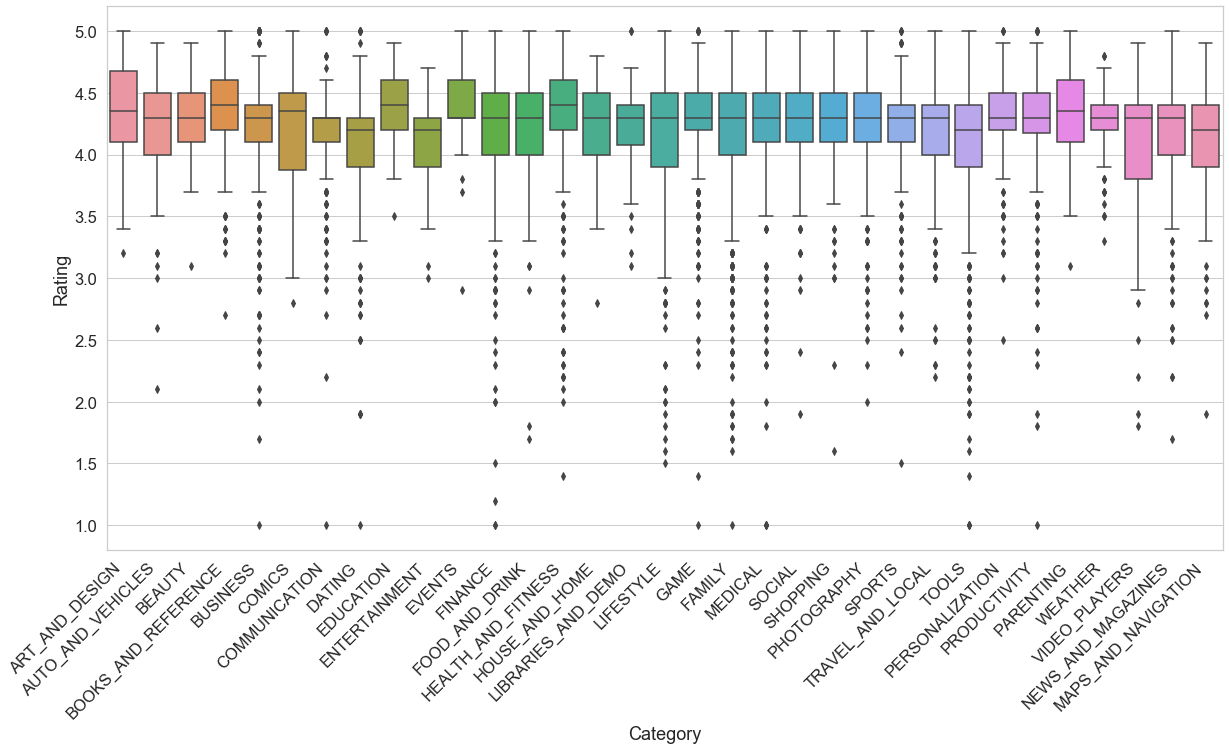

In [274]:
# TO IDENTIFY APPLICATION CATEGORY THAT HAVE THE HIGHEST RATING 

sns.set(rc={'figure.figsize':(20,10)}, font_scale=1.5, style='whitegrid')
ax = sns.boxplot(x="Category",y="Rating", data=playstore)
labels = ax.set_xticklabels(ax.get_xticklabels(), rotation=45,ha='right')


# CONCLUSION :
# From the data, we can conclude that most of the applications have the ratings of > 4.5. It ranges approximately from 3.0 to 5.0. 
# The application with comics and lifestyle category have the highest range compared with another application cateogry. We can see from how tall the boxes are. 
# I think the application that have the cateogry "Books and Reference", "Medical", "Social", "Shopping", "Photography", and "Parenting" are recommended category because the rating range lies between 3.5 - 5.0

In [275]:
# TO IDENTIFY OUTLIERS USING IQR METHOD 

Q1 = playstore.quantile(0.25)
Q3 = playstore.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Rating    0.4
dtype: float64


In [277]:
playstore_out = playstore[~((playstore < (Q1 - 1.5 * IQR)) |(playstore > (Q3 + 1.5 * IQR))).any(axis=1)]
playstore_out.shape

(9358, 13)

In [278]:
playstore.shape

(10039, 13)

In [279]:
print(playstore < (Q1 - 1.5 * IQR)) |(playstore > (Q3 + 1.5 * IQR))

       Android Ver    App  Category  Content Rating  Current Ver  Genres  \
0            False  False     False           False        False   False   
1            False  False     False           False        False   False   
2            False  False     False           False        False   False   
3            False  False     False           False        False   False   
4            False  False     False           False        False   False   
...            ...    ...       ...             ...          ...     ...   
10836        False  False     False           False        False   False   
10837        False  False     False           False        False   False   
10838        False  False     False           False        False   False   
10839        False  False     False           False        False   False   
10840        False  False     False           False        False   False   

       Installs  Last Updated  Price  Rating  Reviews   Size   Type  
0         False  

TypeError: Cannot perform 'ror_' with a dtyped [bool] array and scalar of type [NoneType]

In [ ]:
# CATEGORICAL DATA ENCODING 

In [280]:
# Category features encoding

CategoryList = playstore['Category'].unique().tolist() 
CategoryList = ['cat_' + word for word in CategoryList]
playstore = pd.concat([playstore, pd.get_dummies(playstore['Category'], prefix='cat')], axis=1)

In [281]:
# Genres features encoding

LE = preprocessing.LabelEncoder()
preprocessing.LabelEncoder()
playstore['Genres'] = LE.fit_transform(playstore['Genres'])

In [282]:
# Content Rating features encoding

LE = preprocessing.LabelEncoder()
playstore['Content Rating'] = LE.fit_transform(playstore['Content Rating']).astype(int)

In [283]:
# Installs cleaning

playstore['Installs'] = playstore['Installs'].apply(lambda x : x.strip('+').replace(',', ''))

In [284]:
# Convert Kbytes to Mbytes

k_indices = playstore['Size'].loc[playstore['Size'].str.contains('k')].index.tolist()

converter = pd.DataFrame(playstore.loc[k_indices, 'Size'].apply(lambda x: x.strip('k')).astype(float).apply(lambda x: x / 1024).apply(lambda x: round(x, 3)).astype(str))

playstore.loc[k_indices,'Size'] = converter

In [285]:
# Size cleaning

playstore['Size'] = playstore['Size'].apply(lambda x: x.strip('M'))
playstore[playstore['Size'] == 'Varies with device'] = 0
playstore['Size'] = playstore['Size']

In [286]:
playstore.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,...,cat_PERSONALIZATION,cat_PHOTOGRAPHY,cat_PRODUCTIVITY,cat_SHOPPING,cat_SOCIAL,cat_SPORTS,cat_TOOLS,cat_TRAVEL_AND_LOCAL,cat_VIDEO_PLAYERS,cat_WEATHER
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19,10000,Free,0,1,8,...,0,0,0,0,0,0,0,0,0,0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14,500000,Free,0,1,11,...,0,0,0,0,0,0,0,0,0,0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0,1,8,...,0,0,0,0,0,0,0,0,0,0
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25,50000000,Free,0,4,8,...,0,0,0,0,0,0,0,0,0,0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0,1,10,...,0,0,0,0,0,0,0,0,0,0


In [287]:
playstore.describe()

,Rating,Content Rating,Genres,cat_ART_AND_DESIGN,cat_AUTO_AND_VEHICLES,cat_BEAUTY,cat_BOOKS_AND_REFERENCE,cat_BUSINESS,cat_COMICS,cat_COMMUNICATION,...,cat_PERSONALIZATION,cat_PHOTOGRAPHY,cat_PRODUCTIVITY,cat_SHOPPING,cat_SOCIAL,cat_SPORTS,cat_TOOLS,cat_TRAVEL_AND_LOCAL,cat_VIDEO_PLAYERS,cat_WEATHER
count,10039.000000,10039.000000,10039.000000,10039.000000,10039.000000,10039.000000,10039.000000,10039.000000,10039.000000,10039.000000,...,10039.000000,10039.000000,10039.000000,10039.000000,10039.000000,10039.000000,10039.000000,10039.000000,10039.000000,10039.000000
mean,3.512571,1.226716,50.745891,0.005877,0.007272,0.004682,0.016934,0.038550,0.005080,0.024106,...,0.027493,0.023409,0.027792,0.019823,0.020620,0.028788,0.066740,0.018129,0.012949,0.005080
std,1.607143,1.066526,36.842882,0.076440,0.084968,0.068266,0.129030,0.192529,0.071098,0.153386,...,0.163522,0.151205,0.164383,0.139398,0.142114,0.167218,0.249583,0.133426,0.113062,0.071098
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.600000,1.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.300000,1.000000,57.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.400000,1.000000,79.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,5.000000,5.000000,114.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [288]:
# SPLITTING THE DATA SET 

features = ['Reviews', 'Size', 'Installs', 'Content Rating', 'Genres']
features.extend(CategoryList)

X = playstore[features]
y = playstore['Rating']

In [289]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=10)

In [290]:
# FEATURE ENGINEERING 

In [291]:
sc_X = StandardScaler()

In [292]:
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [293]:
# BUILDING THE MODEL 

In [294]:
# DECISION TREE REGRESSION

In [295]:
from sklearn import tree
clf = tree.DecisionTreeRegressor(criterion='mae', max_depth=5, min_samples_leaf=5, random_state=42)
clf.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mae', max_depth=5,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=5, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=42, splitter='best')

In [296]:
accuracy = clf.score(X_test, y_test)
accuracy

0.9194370358194065

In [297]:
# RANDOM FOREST REGRESSION MODEL 

In [298]:
model = RandomForestRegressor(n_estimators = 200, n_jobs=-1, random_state=10)
model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=200, n_jobs=-1, oob_score=False,
                      random_state=10, verbose=0, warm_start=False)

In [299]:
acc = model.score(X_test, y_test)
acc

0.9267222111313042

In [300]:
Pred = model.predict(X_test)
'Mean Absolute Error:', metrics.mean_absolute_error(y_test, Pred)

('Mean Absolute Error:', 0.25498355767406583)

In [301]:
'Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, Pred))

('Root Mean Squared Error:', 0.43616509764541206)

In [302]:
# MODEL EVALUATION USING CROSS VALIDATION 

In [303]:
X = playstore.loc[:,['Reviews', 'Size', 'Installs', 'Content Rating']]

x_train, x_cv, y_train, y_cv = train_test_split(X, playstore.Rating)

clf = tree.DecisionTreeRegressor(criterion='mae', max_depth=5, min_samples_leaf=5, random_state=42)

clf.fit(x_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mae', max_depth=5,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=5, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=42, splitter='best')

In [304]:
ac = clf.score(x_cv, y_cv)
ac

0.9189415965330731

In [305]:
import joblib

In [306]:
joblib.dump(acc, 'modelGoogle')

['modelGoogle']

In [307]:
model = joblib.load('modelGoogle')

In [308]:
model.predict(playstore)

AttributeError: 'numpy.float64' object has no attribute 'predict'

In [ ]:
import pickle

In [ ]:
pickle.dump(acc, open('model_save', 'wb'))

In [ ]:
model = pickle.load(open('model_save', 'rb'))

In [ ]:
model.predict(playstore)[0]